In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
companydata = pd.read_csv("C:/Users/manth/Assignment/Decision Tree/Company_Data.csv")
company_data=companydata
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
company_data.shape

(400, 11)

In [6]:
# splitting the target Variable in to 2 parts
def split(num):
    if num < 5:
        return 'Low sale'
    elif num >= 5 and num < 10:
        return 'Average sale'
    else:
        return 'High sale'
company_data.Sales = company_data.Sales.apply(split)

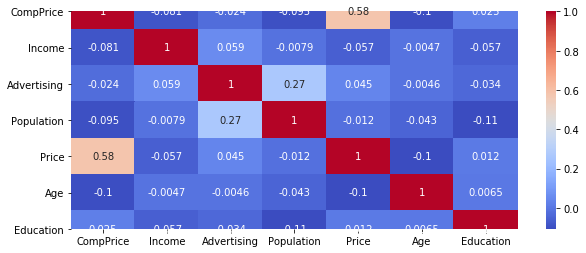

In [7]:
#Correlation heatmap
corr = company_data.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr,xticklabels=True,yticklabels=True,annot = True,cmap ='coolwarm')

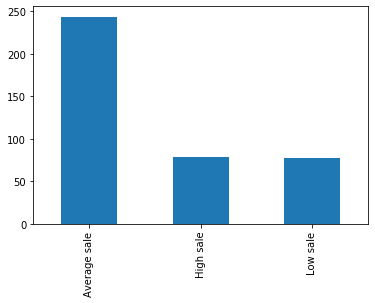

Average sale    244
High sale        79
Low sale         77
Name: Sales, dtype: int64


In [8]:
company_data['Sales'].value_counts(sort=True).plot.bar()
plt.show()
print(company_data['Sales'].value_counts())

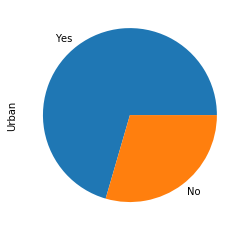

Yes    282
No     118
Name: Urban, dtype: int64


In [9]:
company_data['Urban'].value_counts().plot.pie()
plt.show()
print(company_data['Urban'].value_counts())

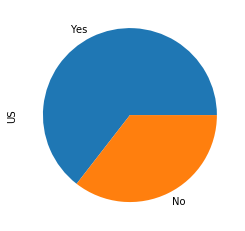

Yes    258
No     142
Name: US, dtype: int64


In [10]:
company_data['US'].value_counts().plot.pie()
plt.show()
print(company_data['US'].value_counts())

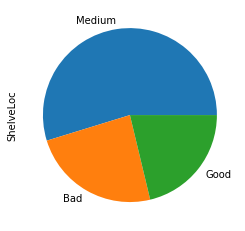

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


In [11]:
company_data['ShelveLoc'].value_counts(sort=True).plot.pie()
plt.show()
print(company_data['ShelveLoc'].value_counts())

In [12]:
from sklearn.preprocessing import LabelEncoder

label= LabelEncoder()
company_data1 = company_data[['ShelveLoc', 'Urban','US']].apply(label.fit_transform)
company_data1 = company_data1.rename(columns={'ShelveLoc':'ShelveLoc_', 'Urban':'Urban_','US':'US_'})
company_data1.head()

,ShelveLoc_,Urban_,US_
0,0,1,1
1,1,1,1
2,2,1,1
3,2,1,1
4,0,1,0


In [13]:
company_data = pd.concat([company_data,company_data1], axis=1, sort=False)
company_data =company_data.drop(columns={'ShelveLoc','Urban','US'},axis=1)
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_,Urban_,US_
0,Average sale,138,73,11,276,120,42,17,0,1,1
1,High sale,111,48,16,260,83,65,10,1,1,1
2,High sale,113,35,10,269,80,59,12,2,1,1
3,Average sale,117,100,4,466,97,55,14,2,1,1
4,Low sale,141,64,3,340,128,38,13,0,1,0


In [14]:
colnames=list(company_data.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_',
 'Urban_',
 'US_']

In [15]:
predictors = colnames[1:10]
target = colnames[0]

In [16]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(company_data,test_size = 0.2)

## Decision Tree

In [17]:
from sklearn.tree import  DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(train[predictors],train[target])


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
preds = model.predict(test[predictors])
pd.Series(preds).value_counts()

Average sale    45
Low sale        20
High sale       15
dtype: int64

In [19]:
pd.crosstab(test[target],preds)

col_0,Average sale,High sale,Low sale
Sales,,,
Average sale,30,5,12
High sale,7,10,0
Low sale,8,0,8


## Actual vs Predicted Values

In [20]:
df=pd.DataFrame({'Actual':test[target], 'Predicted':preds})
df

,Actual,Predicted
314,Average sale,Average sale
376,High sale,High sale
119,Average sale,Average sale
31,Average sale,Average sale
46,High sale,High sale
...,...,...
336,Average sale,Low sale
304,High sale,High sale
48,Low sale,Low sale
259,Average sale,Low sale


In [21]:
print(np.mean(preds==test.Sales))

0.6
